<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [131]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [132]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [133]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [134]:
npR

array([[-1.3212, -1.1001, -1.1174, -0.5234, -0.5213],
       [ 0.    ,  0.7944,  0.2718,  0.7268,  0.4024],
       [ 0.    ,  0.    ,  0.6997, -0.0567, -0.1611],
       [ 0.    ,  0.    ,  0.    , -0.6123,  0.1372],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.2767]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [137]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    Q=Q.T
    ##Your Code start here
    b=A.T
    for i in range(n):
        c=b[0:i]
        if(i!=0):
            u=np.dot(np.dot(c.T,np.linalg.inv(np.dot(c,c.T))),c)
            v=b[i]-np.dot(u,b[i].T)
        else:
            v=b[i]
        Q[i]=v/np.linalg.norm(v,ord=2)
    Q=Q.T
    for i in range(n):
        c=np.zeros([n],dtype=np.float64)
        c[0:i+1]=np.dot(Q.T[0:i+1],A.T[i].T)
        R[i]=c
    R=R.T
    ##Your Code ends here
    return Q, R

In [138]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [139]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [140]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [142]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    b=A.T
    Q=Q.T
    for i in range(n):
        v=b[i]
        if(i!=0):
            for j in range(i):
                u=np.matmul(np.reshape(Q[j],(1,n)).T,np.reshape(Q[j],(1,n)))
                v=v-np.dot(u,b[i].T)
        Q[i]=v/np.linalg.norm(v,ord=2)
    Q=Q.T
    for i in range(n):
        c=np.zeros([n],dtype=np.float64)
        c[0:i+1]=np.dot(Q.T[0:i+1],A.T[i].T)
        R[i]=c
    R=R.T
    ##Your Code ends here
    return Q, R

In [144]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [145]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [146]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [147]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [148]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

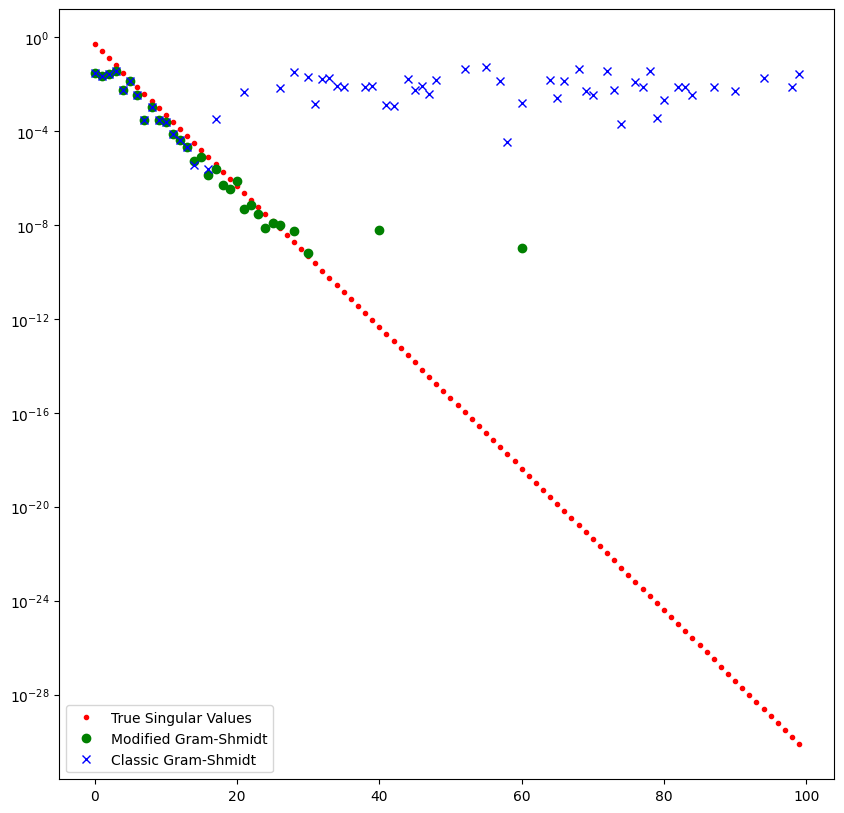

In [149]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [150]:
##Your Code start here
def QR_method(A):
    B=A.copy()
    for i in range(100):
        Q,R=mgs(B)
        B=R@Q
    return(B)
##Your Code ends here


In [151]:

A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)
print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print(QR_method(A))
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
[[ 2.8019 -0.      0.      0.    ]
 [-0.      1.445   0.      0.    ]
 [ 0.     -0.     -0.247   0.    ]
 [ 0.      0.      0.      3.    ]]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

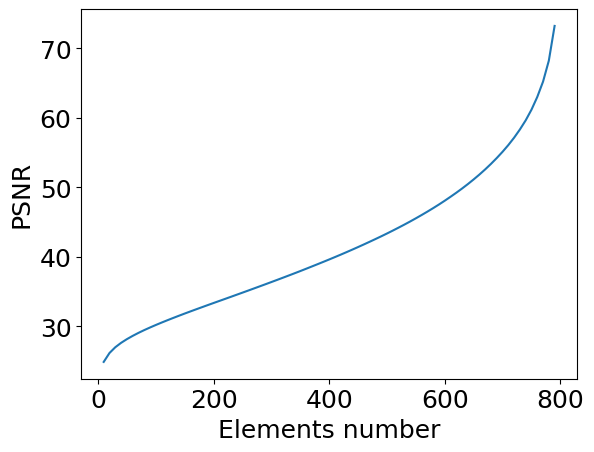

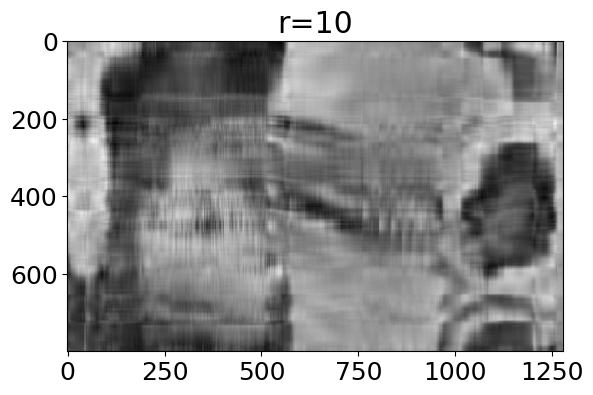

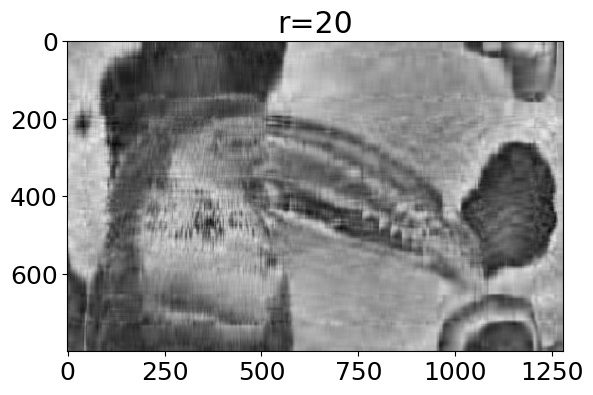

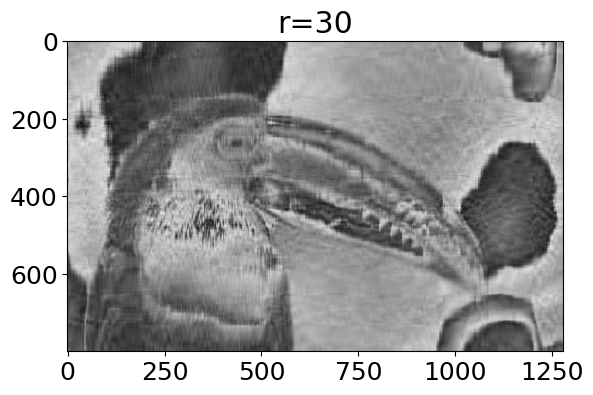

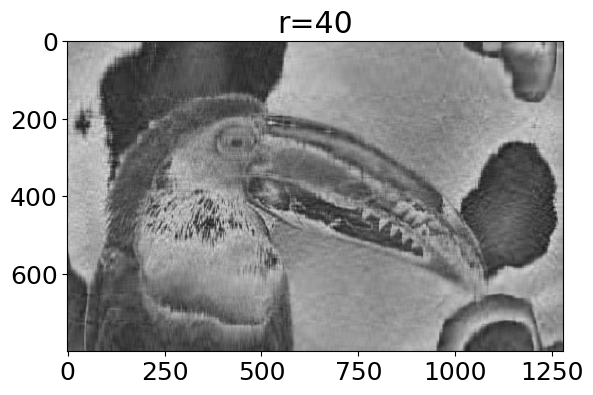

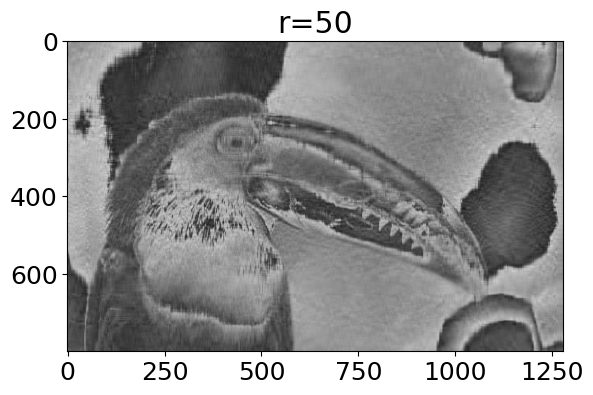

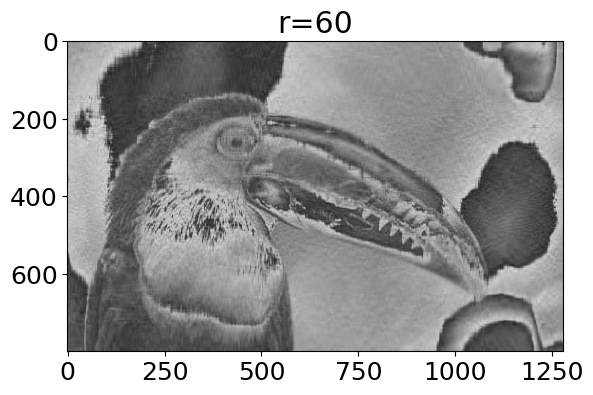

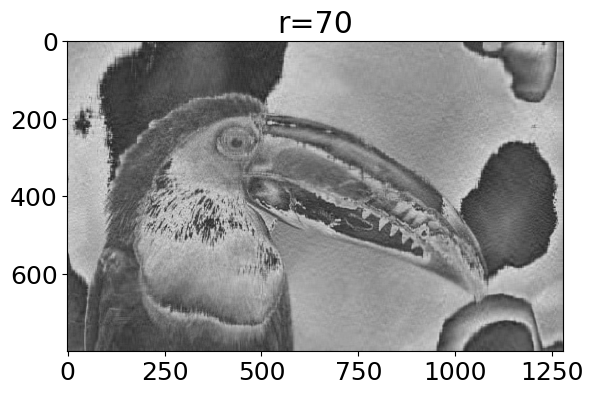

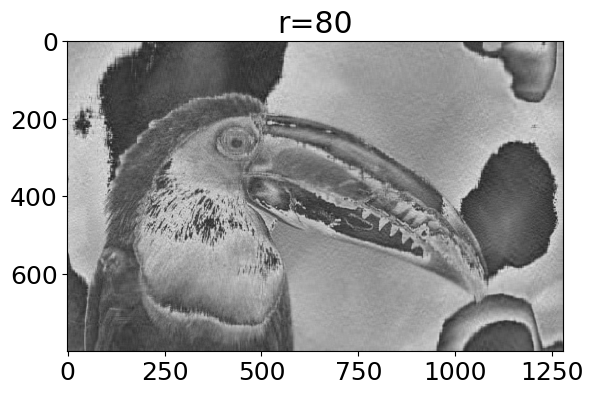

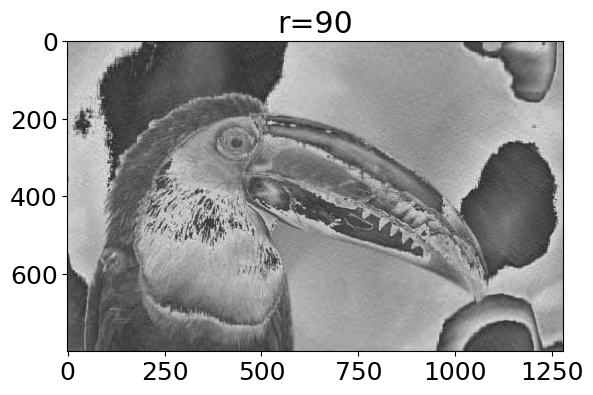

In [152]:
##Your Code start here
import matplotlib.pyplot as plt
from math import log10, sqrt 
image=plt.imread("pic.jpg")
image=(image[:,:,0]+image[:,:,1]+image[:,:,2])/3
U,S,V=np.linalg.svd(image)
elements_number=[]
psnr=[]
for i in range(10,800,10): 
    s=S.copy()
    s[i+1:800]=0
    Sigma = np.zeros((image.shape[0], image.shape[1]))
    Sigma[:image.shape[0], :image.shape[0]] = np.diag(s)
    new_image=U.dot(Sigma.dot(V))
    noise=new_image-image
    MSE=np.mean(np.multiply(noise,noise))
    elements_number.append(i)
    my_PSNR=10*log10(255**2/MSE)
    psnr.append(my_PSNR)
plt.xlabel("Elements number")
plt.ylabel("PSNR")
plt.plot(elements_number,psnr)
plt.show()
for i in range(10,100,10): 
    s=S.copy()
    s[i+1:800]=0
    Sigma = np.zeros((image.shape[0], image.shape[1]))
    Sigma[:image.shape[0], :image.shape[0]] = np.diag(s)
    new_image=U.dot(Sigma.dot(V))
    plt.title("r="+str(i))
    plt.imshow(new_image,cmap='gray')
    plt.show()
##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


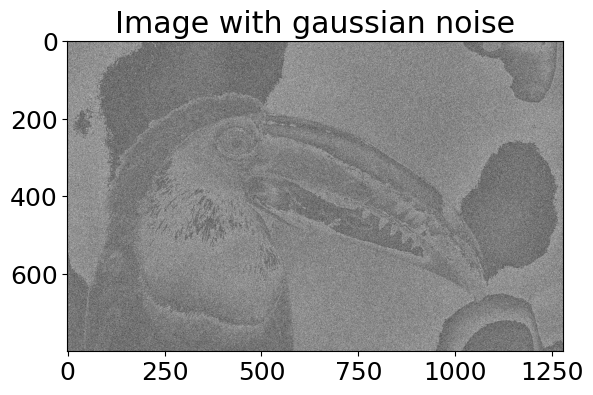

PSNR Gaussian noise :  13.985209399672794


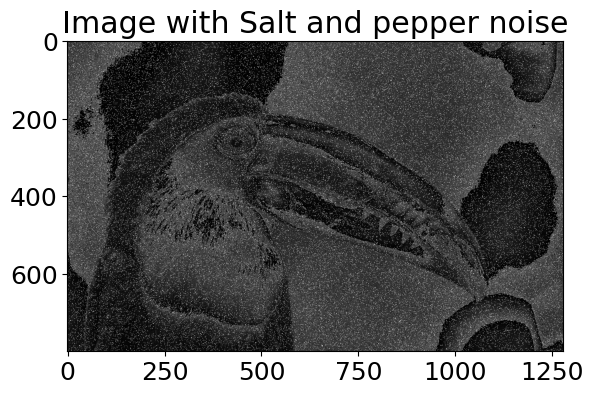

PSNR Salt and pepper noise :  13.959683957221836


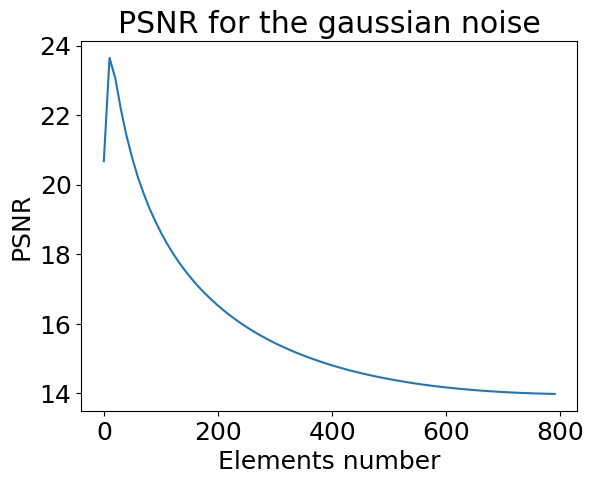

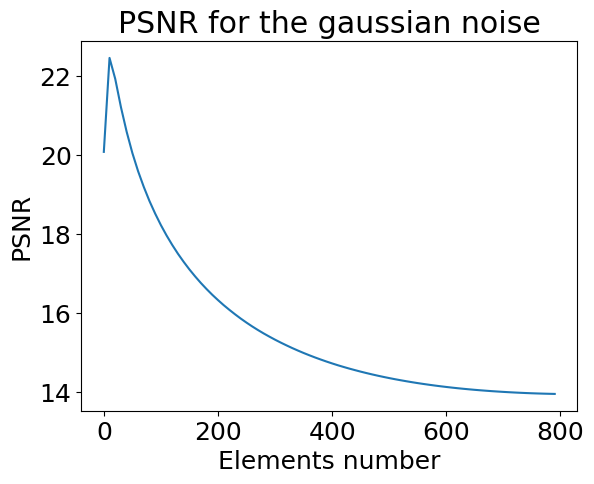

In [153]:
##Your Code start here
gaussian_noise=np.random.normal(0,0.2,[800,1280])
scaled_image=image/255.0
noisy_image_1=scaled_image+gaussian_noise
plt.title("Image with gaussian noise")
plt.imshow(noisy_image_1,cmap='gray')
plt.show()
print("PSNR Gaussian noise : ",10*log10(1/np.mean(np.multiply(gaussian_noise,gaussian_noise))))
noisy_image_2=scaled_image.copy()
p=0.06
salt_noise_x=np.random.randint(0,1280,size=int(p*1280*800))
salt_noise_y=np.random.randint(0,800,size=int(p*1280*800))
for i in range(int(p*1280*800)):
    noisy_image_2[salt_noise_y[i]][salt_noise_x[i]]=1
pepper_noise_x=np.random.randint(0,1280,size=int(p*1280*800))
pepper_noise_y=np.random.randint(0,800,size=int(p*1280*800))
for i in range(int(p*1280*800)):
    noisy_image_2[pepper_noise_y[i]][pepper_noise_x[i]]=0
plt.title("Image with Salt and pepper noise")
plt.imshow(noisy_image_2,cmap='gray')
plt.show()
print("PSNR Salt and pepper noise : ",10*log10(1/np.mean(np.multiply(scaled_image-noisy_image_2,scaled_image-noisy_image_2))))
U1,S1,V1=np.linalg.svd(noisy_image_1)
elements_number_noisy_1=[]
psnr_noisy_1=[]
for i in range(0,800,10): 
    s=S1.copy()
    s[i+1:800]=0
    Sigma = np.zeros((noisy_image_1.shape[0], noisy_image_1.shape[1]))
    Sigma[:noisy_image_1.shape[0], :noisy_image_1.shape[0]] = np.diag(s)
    new_image=U1.dot(Sigma.dot(V1))
    noise=new_image-scaled_image
    MSE=np.mean(np.multiply(noise,noise))
    elements_number_noisy_1.append(i)
    my_PSNR=10*log10(1/MSE)
    psnr_noisy_1.append(my_PSNR)
plt.title("PSNR for the gaussian noise")
plt.xlabel("Elements number")
plt.ylabel("PSNR")
plt.plot(elements_number_noisy_1,psnr_noisy_1)
plt.show()
U2,S2,V2=np.linalg.svd(noisy_image_2)
elements_number_noisy_2=[]
psnr_noisy_2=[]
for i in range(0,800,10): 
    s=S2.copy()
    s[i+1:800]=0
    Sigma = np.zeros((noisy_image_1.shape[0], noisy_image_1.shape[1]))
    Sigma[:noisy_image_1.shape[0], :noisy_image_1.shape[0]] = np.diag(s)
    new_image=U2.dot(Sigma.dot(V2))
    noise=new_image-scaled_image
    MSE=np.mean(np.multiply(noise,noise))
    elements_number_noisy_2.append(i)
    my_PSNR=10*log10(1/MSE)
    psnr_noisy_2.append(my_PSNR)
plt.title("PSNR for the gaussian noise")
plt.xlabel("Elements number")
plt.ylabel("PSNR")
plt.plot(elements_number_noisy_2,psnr_noisy_2)
plt.show()
##Your Code ends here

The method is more effective for the gaussian noise because the peak value if the PSNR is more.

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler

### Import Dataset

In [157]:
Datapoint = pd.read_csv('Datapoint.csv',header=None)


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

<Axes: >

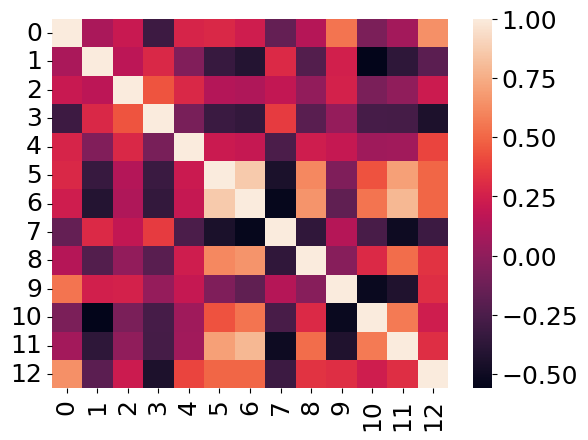

In [158]:
##Your Code start here
sns.heatmap(Datapoint.corr())
##Your Code ends here

I suggest 4 principal components because as we see in the heat-map, the features are not highly correlated to choose a small number and not so independent to choose a large number. So i think that 4 principal components is suitable.

###  Data Preprocessing

In [159]:
Datapoint.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

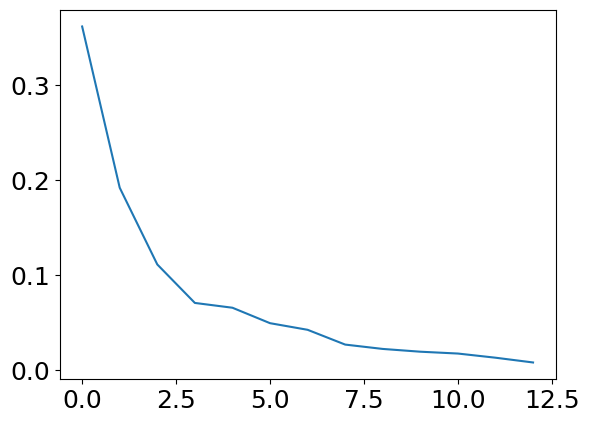

In [160]:
##Your Code start here
my_scalar1=StandardScaler()
scaled1_Datapoint=my_scalar1.fit_transform(Datapoint)
my_pca1=PCA()
data1=my_pca1.fit_transform(scaled1_Datapoint)
exp_var1=my_pca1.explained_variance_ratio_
plt.plot(exp_var1)
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [212]:
##Your Code start here
cov_data1=np.cov(scaled1_Datapoint.T)
eigen_values1,eigen_vectors1=np.linalg.eig(cov_data1)
pca_std_datapoint=eigen_vectors1.T[0:4] @ scaled1_Datapoint.T
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

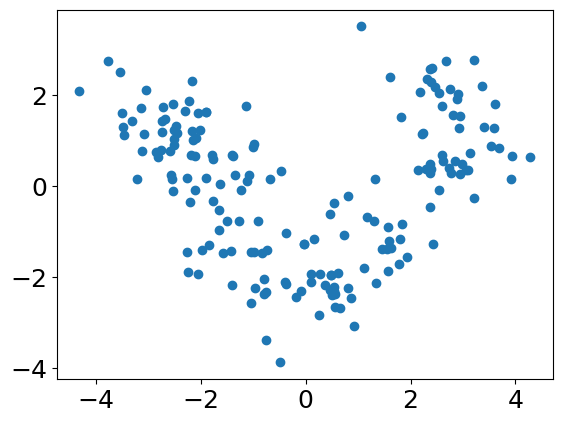

In [214]:
##Your Code start here
plt.scatter(pca_std_datapoint[0],pca_std_datapoint[1])
plt.show()
##Your Code ends here

I guess that 2 clusters is suitable for this data.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




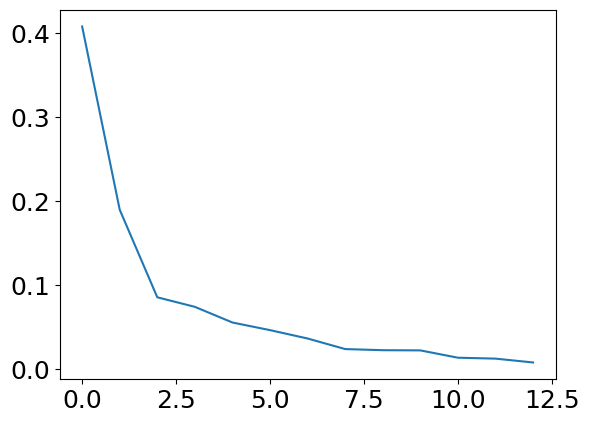

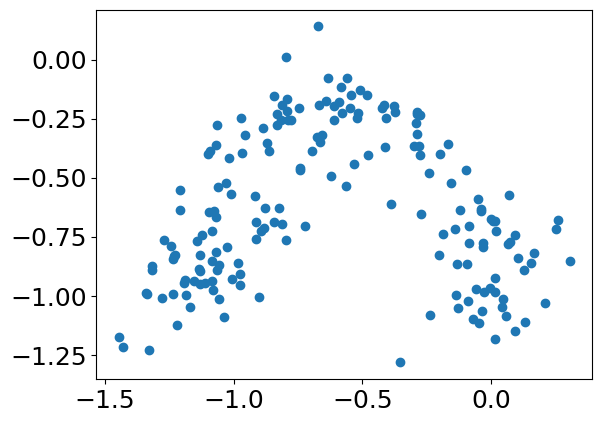

In [215]:
##Your Code start here
my_scalar2=MinMaxScaler()
scaled2_Datapoint=my_scalar2.fit_transform(Datapoint)
my_pca2=PCA()
X2_pca=my_pca2.fit_transform(scaled2_Datapoint)
exp_var2=my_pca2.explained_variance_ratio_
plt.plot(exp_var2)
plt.show()
cov_data2=np.cov(scaled2_Datapoint.T)
eigen_values2,eigen_vectors2=np.linalg.eig(cov_data2)
pca_minmax_datapoint=eigen_vectors2.T[0:4] @ scaled2_Datapoint.T
plt.scatter(pca_minmax_datapoint[0],pca_minmax_datapoint[1])
plt.show()
##Your Code ends here

The number of principal components with high variance was more in the standard scalar.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

What is inertia and silhouette metrics?
Explain them briefly.




The Inertia metric mesures the square of distance of a point to the center of its cluster and average it for all the points.$\newline$
The Silhoutte metric is a way to compare the distance of a point to the points in the same cluster and the distance of a point to the nearest cluster that it doesn't belong to and averaging this for all the points.

In [216]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint.T)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 18.45it/s]


In [217]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint.T)
    silhouette[i] = sil(pca_std_datapoint.T, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 19.49it/s]


Plot the **inertia** and **silhouette ** values

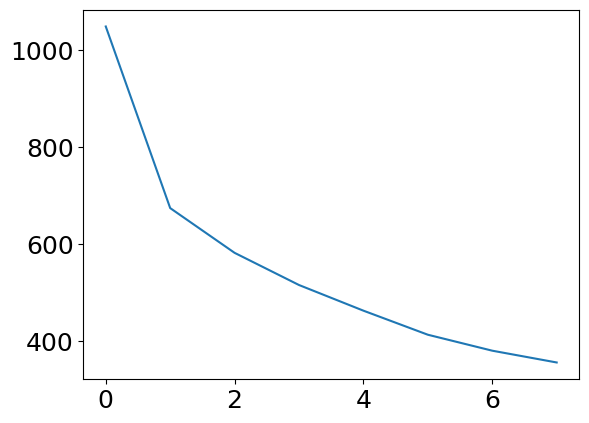

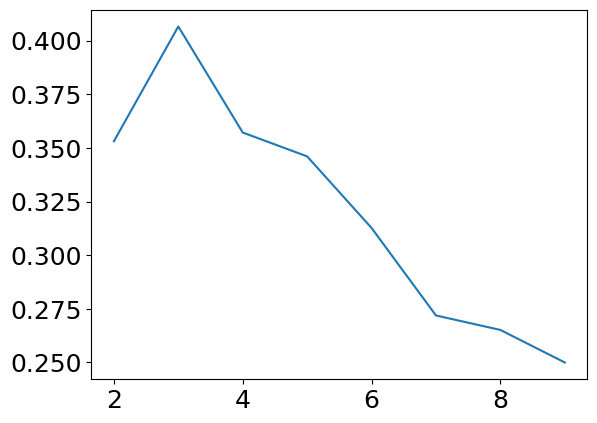

In [218]:
##Your Code start here
plt.plot(inertia)
plt.show()
plt.plot(silhouette.keys(),silhouette.values())
plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [219]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint.T)

c:\Users\Pejvak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The best K to choose for the number of clusters is 3.

#Now plot the datapoints usig two first features
(Each cluster in a different colour)

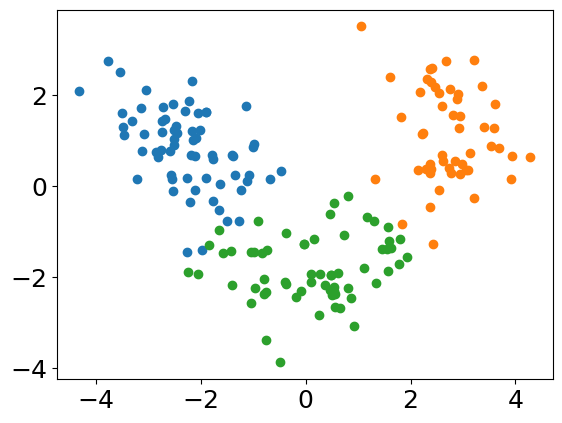

In [220]:
x_cluster1=[]
y_cluster1=[]
x_cluster2=[]
y_cluster2=[]
x_cluster3=[]
y_cluster3=[]
for i in range(len(y_predict_kmeans1)):
    if(y_predict_kmeans1[i]==0):
        x_cluster1.append(pca_std_datapoint[0][i])
        y_cluster1.append(pca_std_datapoint[1][i])
    if(y_predict_kmeans1[i]==1):
        x_cluster2.append(pca_std_datapoint[0][i])
        y_cluster2.append(pca_std_datapoint[1][i])
    if(y_predict_kmeans1[i]==2):
        x_cluster3.append(pca_std_datapoint[0][i])
        y_cluster3.append(pca_std_datapoint[1][i])
plt.scatter(x_cluster1,y_cluster1)
plt.scatter(x_cluster2,y_cluster2)
plt.scatter(x_cluster3,y_cluster3)
plt.show()

Do all previous steps for MinMax scaled data points.





In [221]:
inertia1 = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_minmax_datapoint.T)
    inertia1.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 19.73it/s]


In [222]:
silhouette1 = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_minmax_datapoint.T)
    silhouette1[i] = sil(pca_minmax_datapoint.T, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 19.56it/s]


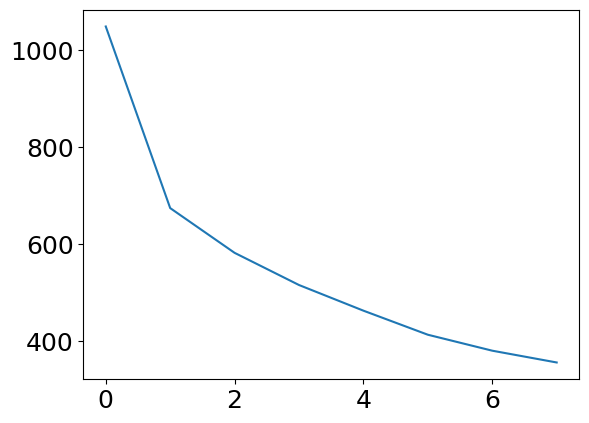

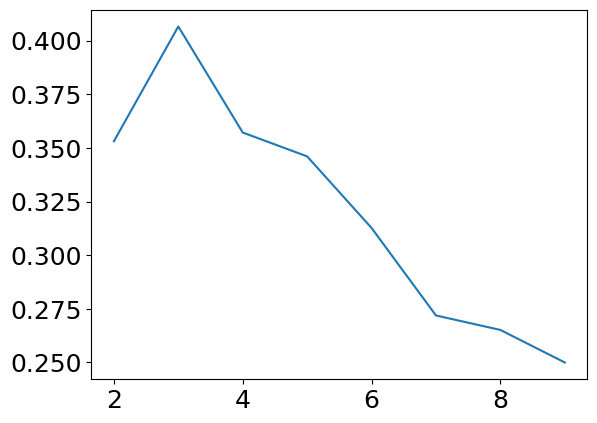

In [223]:
plt.plot(inertia)
plt.show()
plt.plot(silhouette.keys(),silhouette.values())
plt.show()

c:\Users\Pejvak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


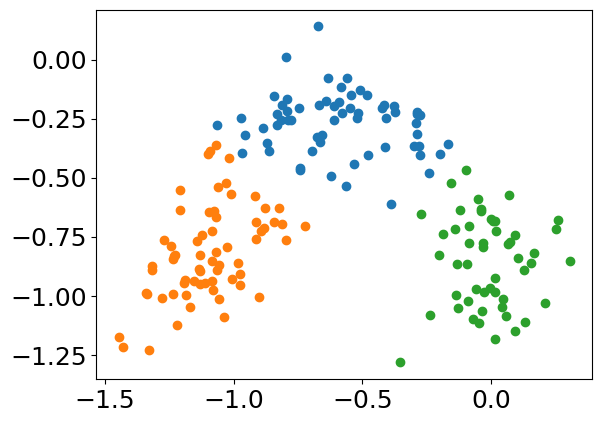

In [225]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_minmax_datapoint.T)
x_cluster1=[]
y_cluster1=[]
x_cluster2=[]
y_cluster2=[]
x_cluster3=[]
y_cluster3=[]
for i in range(len(y_predict_kmeans1)):
    if(y_predict_kmeans1[i]==0):
        x_cluster1.append(pca_minmax_datapoint[0][i])
        y_cluster1.append(pca_minmax_datapoint[1][i])
    if(y_predict_kmeans1[i]==1):
        x_cluster2.append(pca_minmax_datapoint[0][i])
        y_cluster2.append(pca_minmax_datapoint[1][i])
    if(y_predict_kmeans1[i]==2):
        x_cluster3.append(pca_minmax_datapoint[0][i])
        y_cluster3.append(pca_minmax_datapoint[1][i])
plt.scatter(x_cluster1,y_cluster1)
plt.scatter(x_cluster2,y_cluster2)
plt.scatter(x_cluster3,y_cluster3)
plt.show()

Compare the results of different scaling methods in a PCA problem

Actually the MinMax method is sensitive to ouyliers because the method that it uses for the scaling is based on the minimum and maximum of a feature. But the standard scaling is based on the mean and variance and is not affected by the outliers.$\newline$
But actually because our data does not have any putlier points, it these two methods do not have diffrent results for the number of clusters.